#### Importing dependencies

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the data

In [2]:
data = pd.read_csv('/users/anurag/desktop/coding_ninjas/python projects/Logistic Regression/training_titanic.csv',delimiter=',')

In [3]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 11 columns):
Pclass      668 non-null int64
Name        668 non-null object
Sex         668 non-null object
Age         536 non-null float64
SibSp       668 non-null int64
Parch       668 non-null int64
Ticket      668 non-null object
Fare        668 non-null float64
Cabin       154 non-null object
Embarked    667 non-null object
Survived    668 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 57.5+ KB


In [5]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,0.407186,32.064552,0.402695
std,0.831638,14.240257,1.080327,0.854695,45.320835,0.490808
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,29.000000,0.000000,0.000000,14.750000,0.000000
75%,3.000000,38.250000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# Who were the passengers on the Titanic?

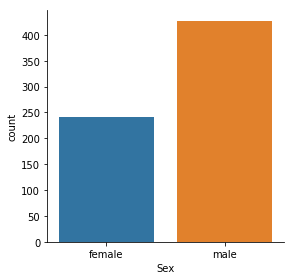

In [6]:
sns.factorplot('Sex',data=data,kind='count',aspect=1)
plt.show()

#### Unsurprisingly, there were considerably more male passengers onboard.

## Let's take a look at how the passengers were divided among different classes.

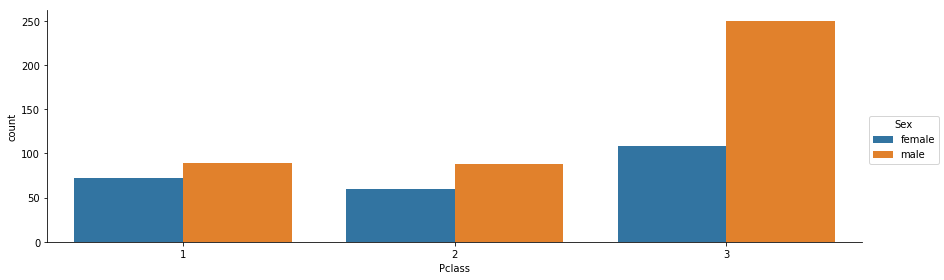

In [7]:
sns.factorplot('Pclass',data=data,hue='Sex',kind='count',aspect=3)
plt.show()

#### Thus it is clear that majority of people were travelling by 3rd class

## Now just check that out of total people how many of them are kids

In [8]:
def child(passenger):
    age=passenger['Age']
    sex=passenger['Sex']
    
    return 'child' if age < 16 else sex

#Using Pandas' apply method to create a new column "Person"
data['Person'] = data.apply(child,axis=1)

In [9]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Person
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1,female
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0,male
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0,male
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0,female
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0,male


In [10]:
print (data['Person'].value_counts())

male      398
female    209
child      61
Name: Person, dtype: int64


#### Thus we get a total of 61 kids were travelling in Titanic

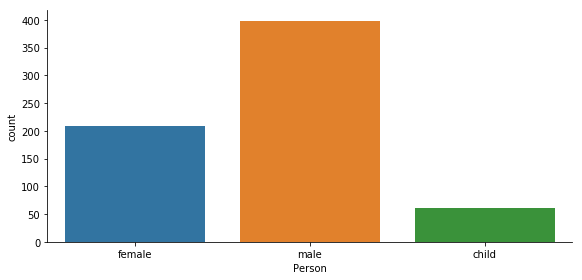

In [11]:
sns.factorplot('Person',data=data,kind='count',aspect=2)
plt.show()

#### Now, let's create a factorplot to check out the distribution of men, women and children belonging to different classes.

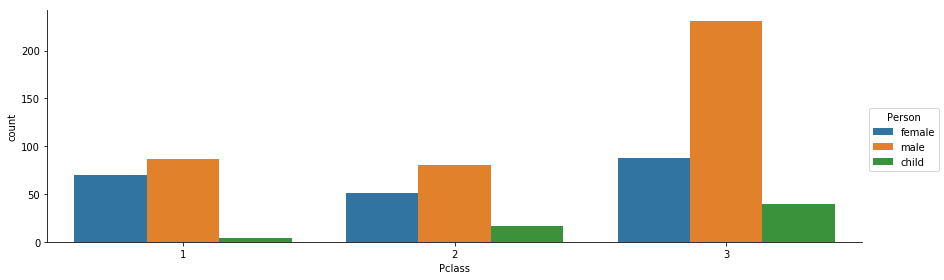

In [12]:
sns.factorplot('Pclass',data=data,hue='Person',kind='count',aspect=3)
plt.show()

#### What's interesting to note above, is that there are way more male passengers than woman or childeren, in the 3rd class, than any other class.

### Now just look at the age distribution using a histogram

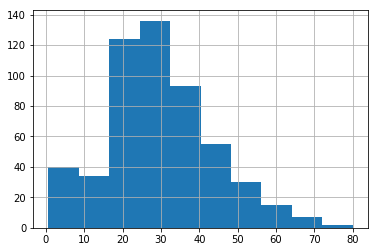

In [13]:
data['Age'].hist()
plt.show()

### Now just look at the age distribution among different classes

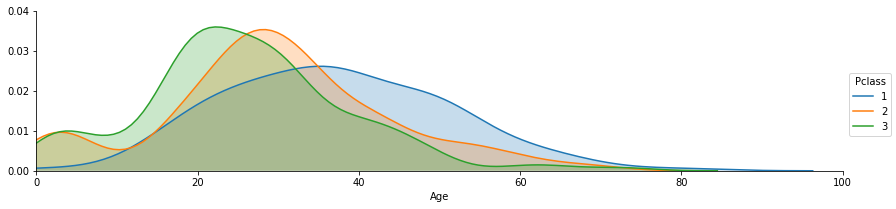

In [14]:
fig = sns.FacetGrid(data,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,100),ylim=(0,0.04))

fig.add_legend()

plt.show()

##### Quite clearly, we can see that the first class passengers belonged more to the middle age groups, with very few children.

##### Second and third class had more children, with relatively fewer older people.

### Now just look at the age distribution among males and females

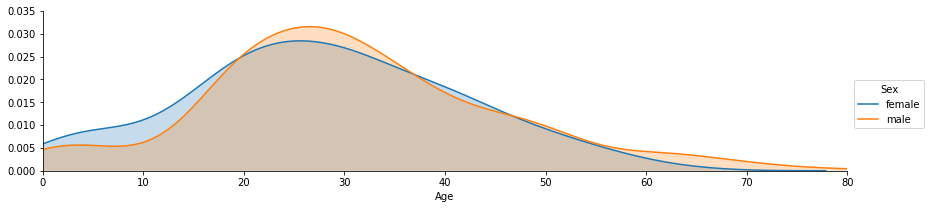

In [15]:
fig = sns.FacetGrid(data,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = data['Age'].max()

fig.set(xlim=(0,oldest),ylim=(0,0.035))

fig.add_legend()
plt.show()

In [16]:
data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
Person        0
dtype: int64

# What deck were the passengers on and how does that relate to their class?

In [17]:
data = data.dropna(axis=0)

In [18]:
data.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Person
6,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,female
18,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S,0,male
26,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,0,male
30,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S,1,female
32,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C,0,male


In [19]:
def get_level(passenger):
    cabin = passenger['Cabin']
    return cabin[0]

In [20]:
data['level']=data.apply(get_level,axis=1)

/Users/Anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
data.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Person,level
6,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,female,C
18,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S,0,male,C
26,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,0,male,A
30,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S,1,female,E
32,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C,0,male,C


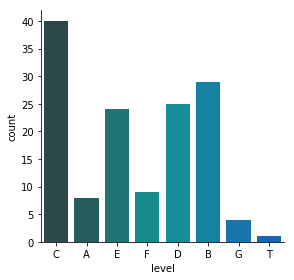

In [22]:
sns.factorplot('level',data=data,palette='winter_d',kind='count')
plt.show()

#### Now it is clear that more passengers were on Level C

# Where did the passengers come from?

#### The Embarked attribute contains data for the passengers' port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

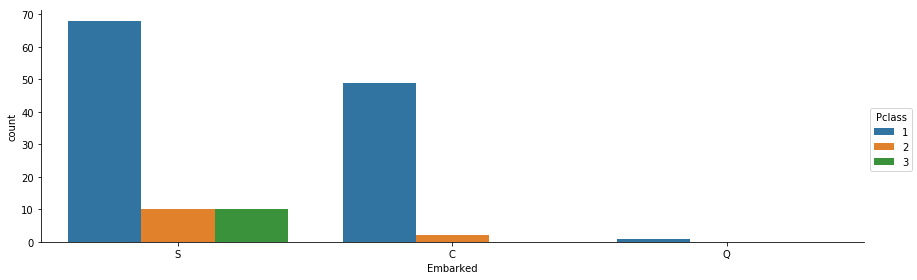

In [23]:
sns.factorplot('Embarked',data=data,hue='Pclass',kind='count',aspect=3)
plt.show()

# which deck has more survived pasengers?

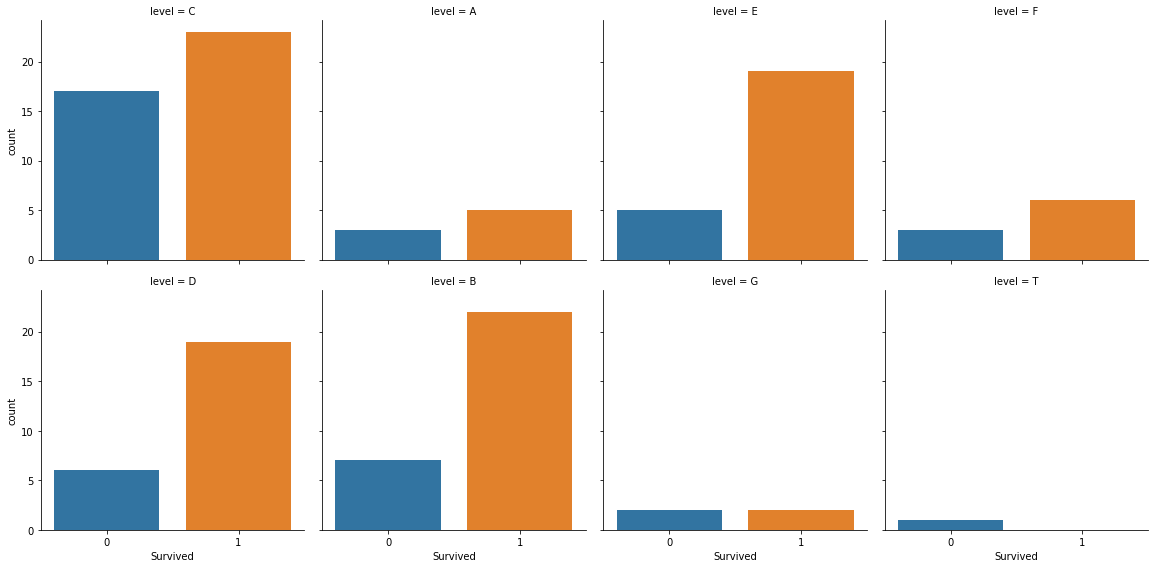

In [24]:
sns.factorplot("Survived", col="level", col_wrap=4, data=data, kind="count")
plt.show()

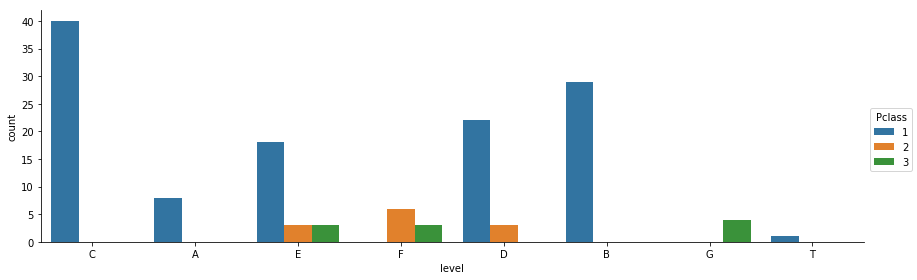

In [25]:
sns.factorplot('level',data=data,hue='Pclass',kind='count',aspect=3)
plt.show()

# Who was with their family?

In [26]:
data['family'] = data['SibSp'] + data['Parch']

/Users/Anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Person,level,family
6,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,female,C,1
18,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S,0,male,C,1
26,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,0,male,A,0
30,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S,1,female,E,2
32,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C,0,male,C,1


In [28]:
data['family'].loc[data['family']>0] = 'No'

data['family'].loc[data['family']==0] = 'Yes'

/Users/Anurag/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the 

In [29]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Person,level,family
6,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,female,C,No
18,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S,0,male,C,No
26,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,0,male,A,Yes
30,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S,1,female,E,No
32,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C,0,male,C,No


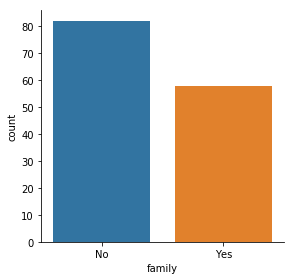

In [30]:
sns.factorplot('family',data=data,kind='count')
plt.show()

#### Thus it is clear that many passengers were travelling alone

# What factors helped someone survive the sinking?

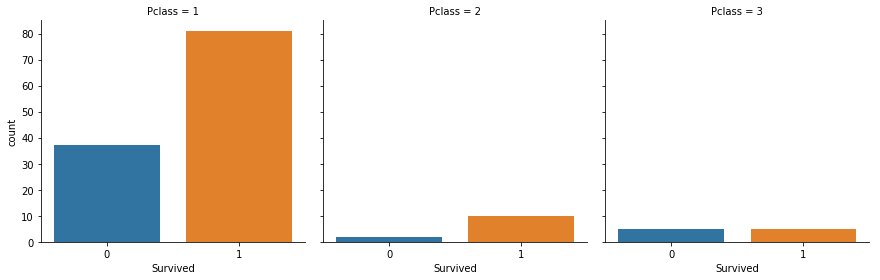

In [31]:
sns.factorplot("Survived", col="Pclass", col_wrap=4, data=data, kind="count")
plt.show()

#### It seems like lower class passengers had a lower chance of survival.

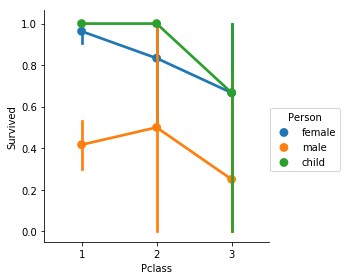

In [32]:
sns.factorplot('Pclass','Survived',hue='Person',data=data)
plt.show()

#### Men had lower chances of survival than women and children, as they had lower priority of being saved.

#### We can still generally say that men, women and children belonging to the 3rd class had a lesser chance at survival than their counterparts belonging to the 1st class.